In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


load_profiles_df = pd.read_csv('./final_table.csv')
load_profiles_df['date'] = pd.date_range(start='1/1/2011', end='12/31/2011')

load_profiles_df = load_profiles_df.set_index('date')
load_profiles_df

,Max Power (W),Min Power (W),Average Power (W),Hour of Peak Power,Hour of Min Power,Different in Peak and Minimum Power (W),Difference in Peak and Minimum Hours
date,,,,,,,
2011-01-01,1080,250,715.217391,2,14,830,12
2011-01-02,1080,-88,565.913043,1,19,1168,18
2011-01-03,1152,-12,581.304348,19,13,1164,6
2011-01-04,1580,-62,563.478261,20,10,1642,10
2011-01-05,1580,-62,552.782609,16,8,1642,8
...,...,...,...,...,...,...,...
2011-12-27,596,-522,101.130435,2,14,1118,12
2011-12-28,496,-358,139.913043,2,19,854,17
2011-12-29,594,-444,108.608696,2,13,1038,11


In [2]:
np_load_profiles_df = load_profiles_df.to_numpy()
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(np_load_profiles_df)
    distortions.append(km.inertia_)

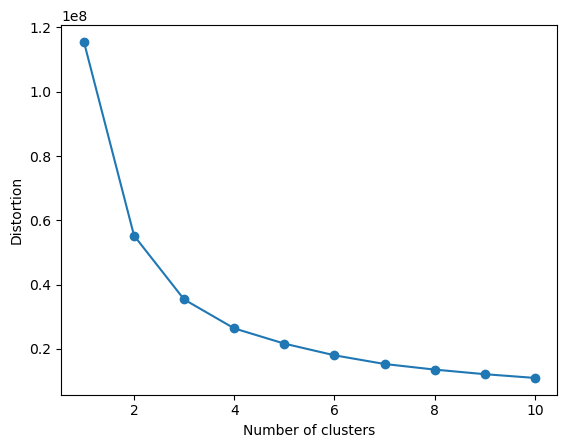

In [3]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# 3 or 4 are decent choices. Decided 3 makes sense because we can separate into meaningful categories -- e.g., "low", "medium", "high" consumption days

In [4]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(np_load_profiles_df)

/Users/gbolla2/miniconda3/envs/eeng415/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


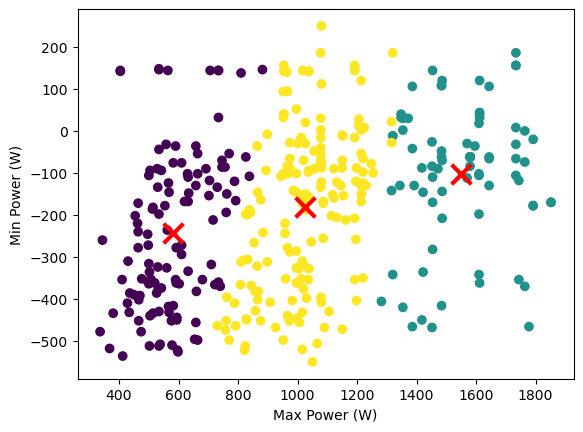

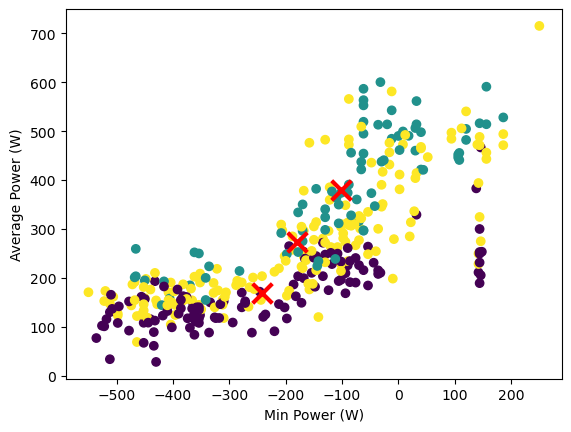

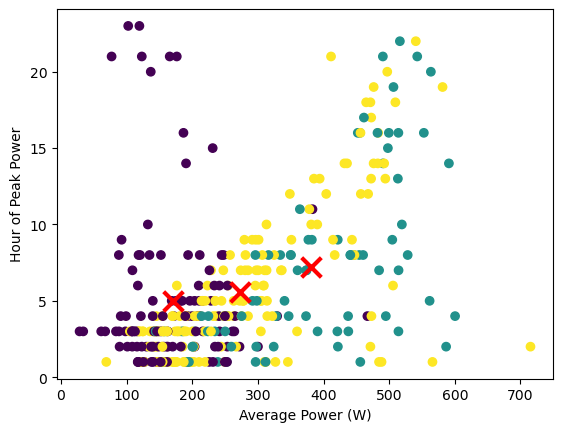

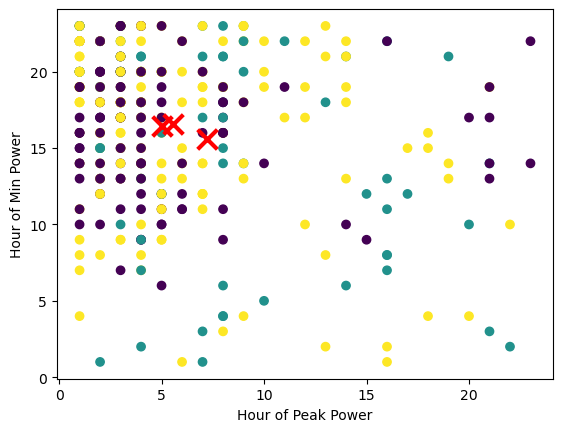

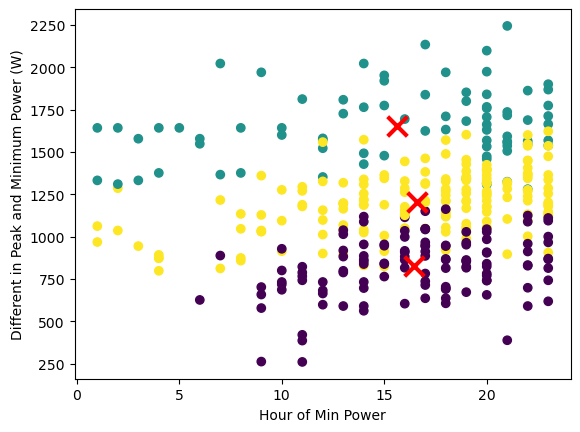

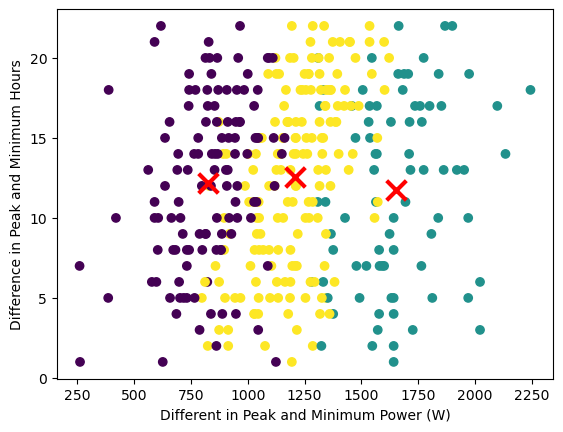

In [5]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

len(load_profiles_df.columns)

for i in range(len(load_profiles_df.columns) - 1):
    plt.scatter(np_load_profiles_df[:,i], np_load_profiles_df[:,i+1], c=labels)
    plt.scatter(centroids[:,i], centroids[:,i+1], marker='x', s=200, linewidths=3, color='r')
    plt.xlabel(load_profiles_df.columns[i])
    plt.ylabel(load_profiles_df.columns[i+1])
    plt.show()
# plt.scatter(np_load_profiles_df[:,2], np_load_profiles_df[:,3], c=labels)
# plt.scatter(centroids[:,2], centroids[:,3], marker='x', s=200, linewidths=3, color='r')
# plt.show()

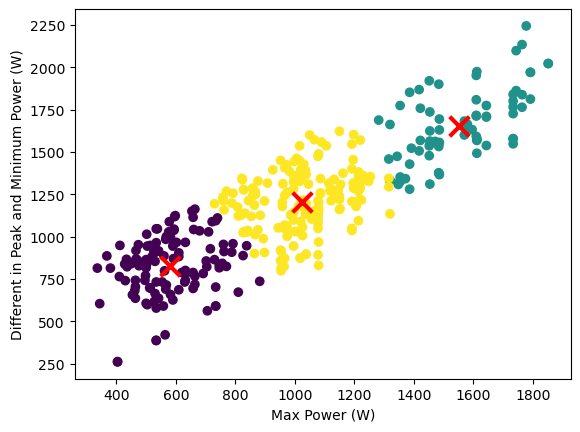

In [6]:
plt.scatter(np_load_profiles_df[:,0], np_load_profiles_df[:,5], c=labels)
plt.scatter(centroids[:,0], centroids[:,5], marker='x', s=200, linewidths=3, color='r')
plt.xlabel(load_profiles_df.columns[0])
plt.ylabel(load_profiles_df.columns[5])
plt.show()

In [10]:
load_profiles_df_w_cluster = load_profiles_df.copy()
load_profiles_df_w_cluster['cluster'] = labels

In [11]:
load_profiles_df_w_cluster.to_csv('./loads_profiles_w_cluster.csv')